# Sell Your Home For A King's Ransom

## A strategic approach to selling your home in King County

**By: Hiten Patel**

To sell or not to sell? This becomes a loaded question when you apply it to your home and a lot of research is involved to even be in the ball park for answers. Some sell their homes because of a new opportunity in a different city, others sell due to because of a family member passing. The process can be a logical one for some, an emotional one for others or both. Whatever may be the reason, you should look to maximize your profits in any case.   

What does the real estate market look like for your area? What improvements should you make to your home to maximize profits? What improvements should you not make?

The purpose of this project is to build a model based on linear regression to help identify what features are important in a home to maximize the selling price of a home. The final model will go through many iterations and tests to ensure that it is the best fit model.

## Dataset

The source for the data came from 'kc_house.data.csv' file. The dataset contains the following information. 

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Methodology: OSEMN Framework

>**Obtain:**
 * Extracting the data from the file source 'kc_house_data.csv'
 
>**Scrub:**
* Explore the raw data set and understanding the values
* Understanding the null values and evaluating the best steps to take to eliminate them. 
* Replacing values and converting data types 
* Deleting irrevalent columns and creating new columns with relevent information

>**Explore:**
* Creating visualizations to better understand the data
* Deciding what data to treat as numerical/categorical 
* Deriving statistics from the data 
* Log transforming numerical data and creating dummy variables for categorical data

>**Model:**
* Base model is created than is analyzed 
* Reviewing the coefficients, p-values, normality and multicollinearity of the data
* Removing data with high multicollinearity using the VIF method
* Build and run the next model
* Removing data with high p-values 
* Test the final model and evaluate if the model holds. 

>**iNtrepret:**
* Evaluating the coefficients 
* Drawing a conclusion from the data
* Commuicating the results with visuals 

## Results

### The Original Data

Referring to our methodology, the first steps to creating our model is to access our data and analyzing it. Using the .info() method we can see there are 21,597 rows and 21 columns. Along with this info, we can also see what type of data type is in each column

Furthermore, we dug a little deeper with some numerical analysis and found that 11% of null values came from 'waterfront' column, 18% of null values from 'yr_renovated' and less than 1% from 'view'. Rather than eliminating the columns, we decided to use the median value for the respective columns in-place for the null values.

Next, we wanted to visually inspect our data with .hist() method with the dependent variable set to 'price'. This gave us an idea of what variables were better suited to be numerical vs categorical and what columns we could possibly delete. 

The following actions were taken; 
* Columns 'lat' and 'long' were removed because there was no linear relationship with 'price'.  

* 'date' column was removed due to, to many unique values

* 'id" column was removed since these were just random numbers assigned to each house. 

* New column "Age" was created by using 'yr_built' and subtracting that from the current year. 'yr_built was then removed. 

* Columns deemed numerical: ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15, 'sqft_lot15, 'Age']

* Columns deemed categorical: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']

### Multicollinearity Analysis

Multicollinearity analysis needs to be done on numerical columns. In this case, we will use the .corr() method and a heat map to visually inspect the data. No immediate changes were made to the data, only observations as we want to see our first model prior to making any changes. 

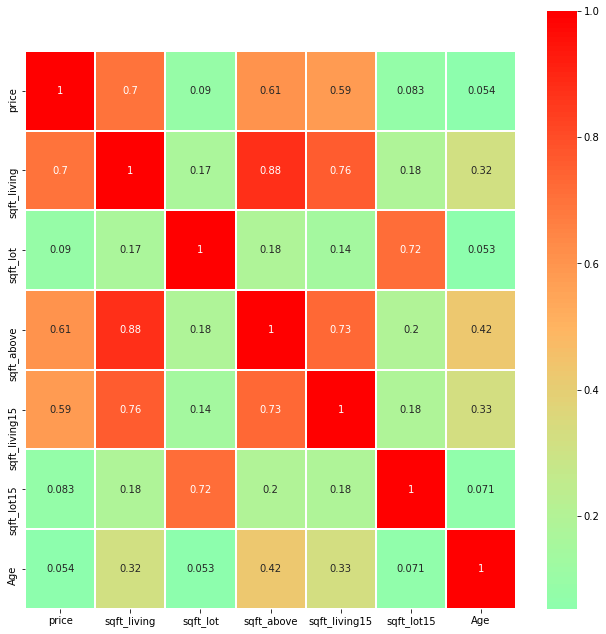

Any value above .75 is considered to be highly correlated. The following observations were made; 
* Price and 'sqft_living have the strongest correlation.
* 'Sqft_living' has a strong correlation with 'sqft_above' and 'sqft_living15' which is indicated by a .75 or higher
* 'Sqft_lot and 'sqft_lot15 have a .72 correlation. 
* 'Sqft-above and 'sqft_living have a .73 correlation.


### Original Model 

The original model was created by using OLS from statsmodel. The data was not normalized and no outliers were removed. The following features were used with the target variable being 'price':

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age']
 
 The original model was generated using the make_model() function:

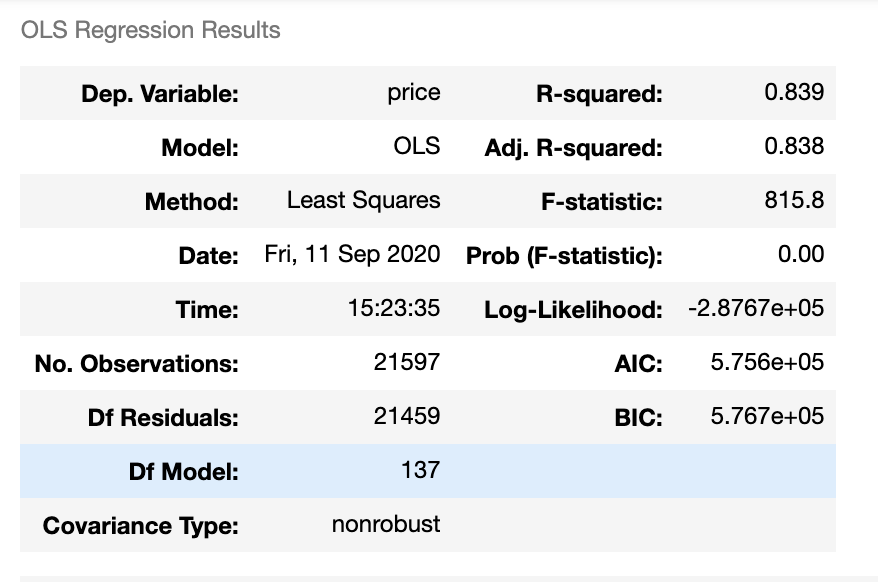

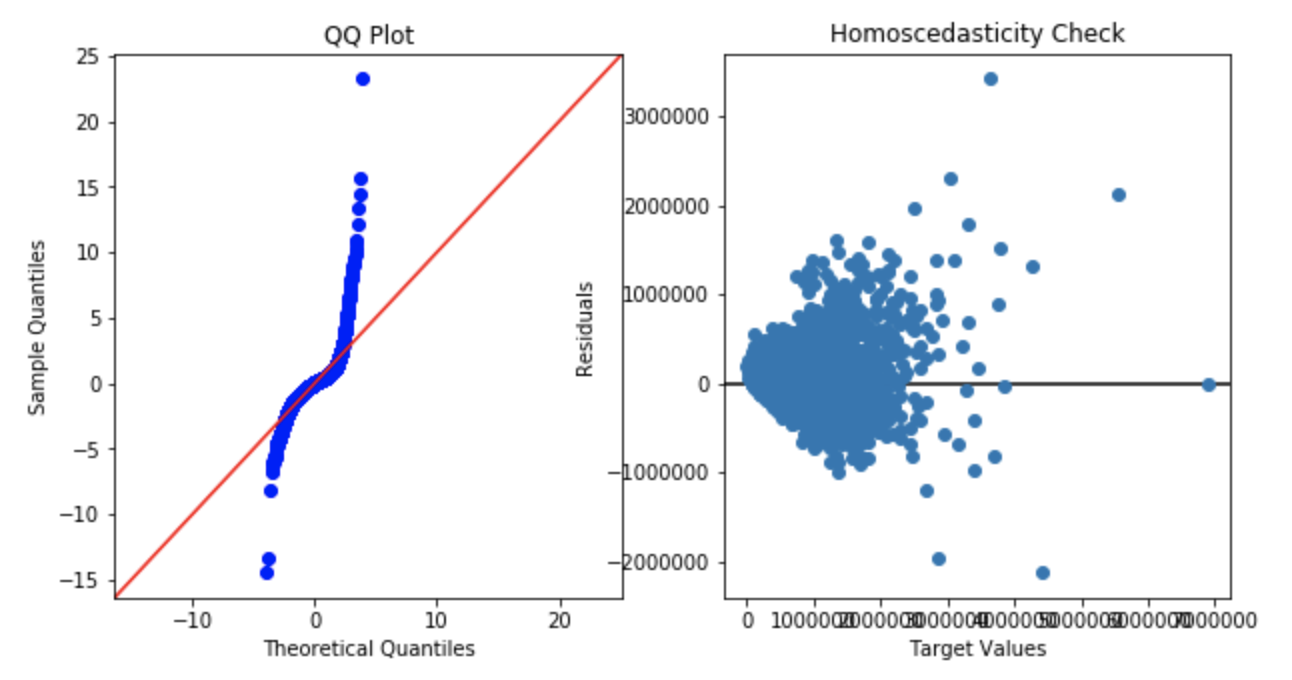

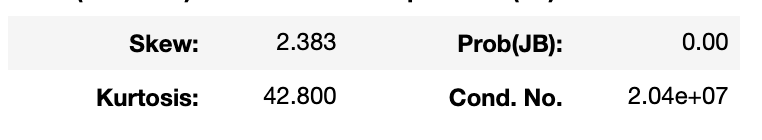

According to the model summary, the original model yielded an R-squared of .839. The skew value of 2.383 suggests that the data distribution is highly skewed and the kurtosis value of 42.8 indicates that the data distribution has heavy tails. The QQ plot shows us visually that we do not have normally distributed residuals and the tails have extreme values. Homoscedasticity test shows hetroscedasticities and does not pass. 

### Final Model & Model Validation 

As we can see in the original model, changes needed to be made to improve our model to accurately predict future projections. 

First, to normalize all numerical data we applied log transformation and performed a one-hot encoding for all categorical data. 

Next, we used the 'variance_inflation_factor' function from statsmodels to calculate multicollinearity. After running the function, any column's values greater than 6 resulted in removing that column from the model formula. And last, we removed any p-values greater than .05. 

The final model yielded an R-squared of .808. The skew level of .112 shows that the data is symmetrical and the kurtosis level of 5.099 shows it is a leptokurtic distribution. 

The QQ plot has vastly improved which is evident by the x and y scales compared to the original model. Homoscedasticity test shows no obvious cone shape pattern pasts the visual test. 

To validate our final model, from sklearn we imported both train_test_split and r2_score. We then split our trained data and test data which consisted .2 of the data frame. 

After running the formula, it produced these results: 

Train = .809

Test = .805

This shows that our model is neither under fitted or over fitted. 





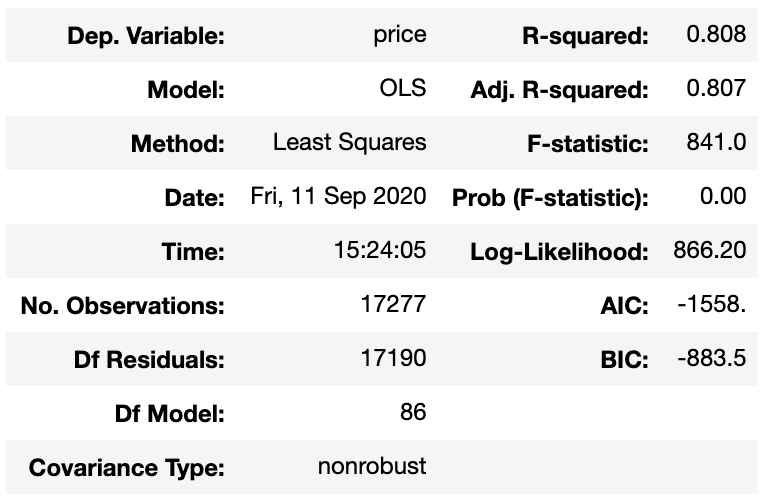

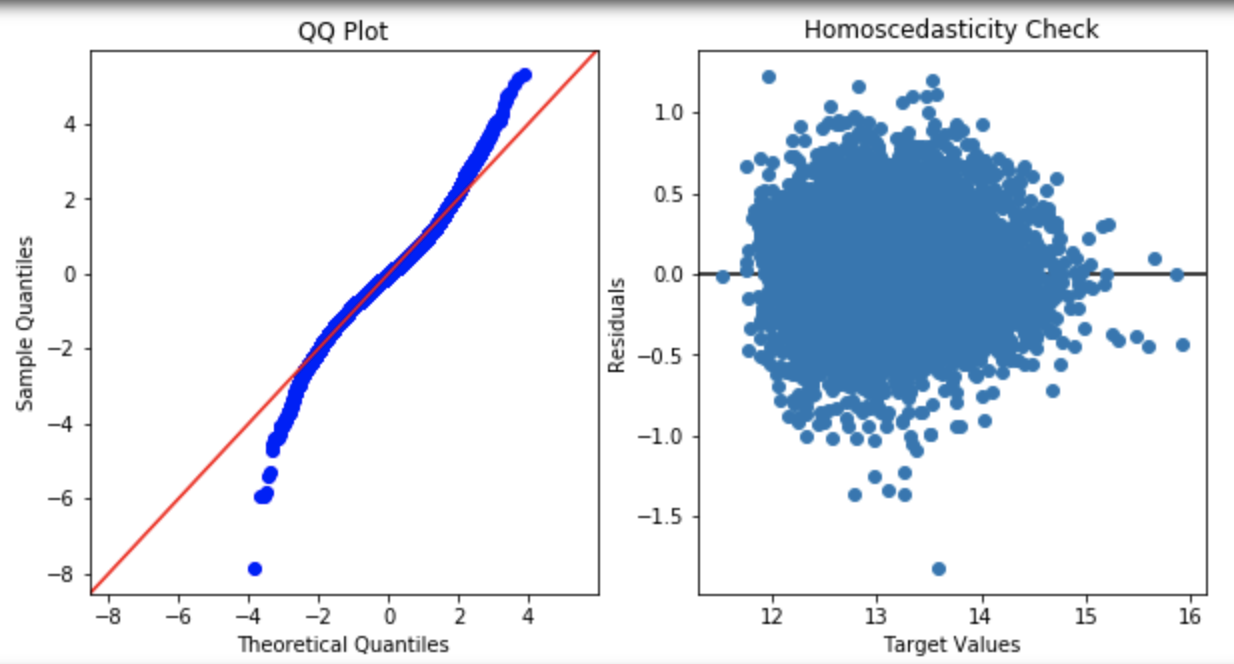

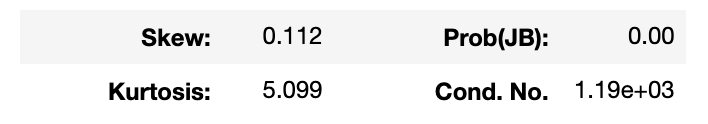

## Intrepretation

To analysis the data, we used the feature coefficients to interpret how a feature would either positively or negatively affect our dependent variable which is 'price'. Below we will list some of the most significant features that had an impact on a selling price of a home. 



### **Age of House**

We created the column 'Age' by subtracting the year the house was built from the current year. The 'Age' coefficient of -.0155 translates to as a house increases in age by 1 year, the selling price decreases by -1.5 percent. We can look at this as depreciation. 

In [2]:
#graph

### **Waterfront Housing**



If your house has a waterfront view, then the coefficient translates to a 58% increase of the sale price. This is one of our most significant features. 

In [3]:
#graph

### **Views of Your Home**

If your home gets viewed, then this will increase the price of your home by almost 19%. This directly relates to marketing. If you show professional photos and videos of your home along with having an experience agent then consumers are more likely to view your home. The more consumers you attract, the more bids you will receive. 

In [4]:
#graph

### **King County Grading**

The grading system for King County goes up to 13 which is the highest grade in the data. A house that receives a grade 13 could potentially see a 86% increase in sale price. As the grades decrease so does the potential. A house receiving a grade between 4-6 could possibly see a decrease in sale price ranging from 49-16 percent. The grades are based on the quality of materials and workmanship the house holds. 

In [5]:
#graph

### Basement Coefficient 

The 'sqft_basement_1' coefficient of .0728 translates to increasing sale price by over 7%. If you have a basement, then showcase it. Consumers will love to know they have extra space to work with. 

In [6]:
# graph 

### Renovations 

Analyzing the 'yr_renovated_1' coefficient which is equal to .1195, shows that if you renovate your home it will increase the sale price by almost 12%. This goes hand in hand with the grading system. Renovate your home with high quality materials and quality workmanship and you will achieve a higher grade.  

In [1]:
#graphs


## Conclusion

Because the linear regressions model that was produced has a 81% predicting power, we are confident in the following recommendations. 
    
Determine if you home is considered to have a water front, if so, the price of your home will increase in value just by checking that box. Next, evaluate your home and determine where renovations are needed. Using quality materials combined with high workmanship will result in a higher grade given by King County and can significantly increase the selling price of the house. 
    
Last but not least, advertise your home with professional photos and videos and an experience real estate agent to generate hype. If you have a basement, market it. You never know what people love. The more views you get, the higher the chance consumers will not only bid, but will need to bid higher to out bid their competitors. 
    
Making the decision to sell your home can be an exhausting one. Taking into consideration the above recommendations will put your mind at ease. Remember, this decision can be a long process and you want to be mindful of your time line as waiting 10-20 years can depreciate your house by a significant amount.

## Future Work

The next steps to improve our model would be to decipher which locations/neighborhoods impact our house value and reanalyzing the square footage of a home compared to price. Also market analysis on when is the best time to sell your home.